In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


Using TensorFlow backend.


# Preprocessing Data

In [23]:
df = pd.read_csv('master_timeseries.csv')

In [24]:
df=df.rename(columns={'Unnamed: 0':'Date'})
df=df.set_index('Date')

In [25]:
msft=pd.DataFrame(df['MSFT'])

In [26]:
len(msft)

3649

In [6]:
# Train & Validate
#train=msft[:3283] # use 2921 for 80% / 3283 for 90%
#valid=msft[3283:]

In [27]:
pd.options.display.max_rows = 500

In [28]:
scaler = MinMaxScaler(feature_range = (0,1))

In [29]:
#train_scaled = scaler.fit_transform(train)
#valid_scaled = scaler.fit_transform(valid)
scaled_data = scaler.fit_transform(msft)

# Split Function

In [30]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


# Splitting the Data

In [31]:
# define input sequence
##input_sequence = list(train_scaled)
##valid_sequence = list(valid_scaled)
sequence = scaled_data

# choose a number of time steps
n_steps = 3284 #3283  

#Features
n_features = 1

# split into samples
X,y=split_sequence(sequence,n_steps)
##X_train, y_train = split_sequence(input_sequence, n_steps)
##X_valid, y_valid = split_sequence(valid_sequence, n_steps) 

# reshape from [samples, timesteps] into [samples, timesteps, features]
##X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
##X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], n_features))
X=X.reshape(((X.shape[0], X.shape[1], n_features)))

# Modeling

In [32]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [33]:
# fit model
result=model.fit(X, y, epochs=100)      

Epoch 1/100
365/365 [==============================] - 34s 94ms/step - loss: 0.4733 - accuracy: 0.0000e+00
Epoch 2/100
365/365 [==============================] - 32s 88ms/step - loss: 0.1397 - accuracy: 0.0055
Epoch 3/100
365/365 [==============================] - 33s 89ms/step - loss: 0.0210 - accuracy: 0.0082
Epoch 4/100
365/365 [==============================] - 32s 89ms/step - loss: 0.0153 - accuracy: 0.0082
Epoch 5/100
365/365 [==============================] - 32s 89ms/step - loss: 0.0015 - accuracy: 0.0082
Epoch 6/100
365/365 [==============================] - 32s 87ms/step - loss: 0.0012 - accuracy: 0.0082
Epoch 7/100
365/365 [==============================] - 32s 88ms/step - loss: 6.0743e-04 - accuracy: 0.0082
Epoch 8/100
365/365 [==============================] - 33s 89ms/step - loss: 3.8263e-04 - accuracy: 0.0082
Epoch 9/100
365/365 [==============================] - 31s 86ms/step - loss: 3.5964e-04 - accuracy: 0.0082
Epoch 10/100
365/365 [==============================] - 3

365/365 [==============================] - 32s 88ms/step - loss: 2.1374e-04 - accuracy: 0.0082
Epoch 78/100
365/365 [==============================] - 32s 88ms/step - loss: 2.1029e-04 - accuracy: 0.0082
Epoch 79/100
365/365 [==============================] - 31s 86ms/step - loss: 2.1110e-04 - accuracy: 0.0082
Epoch 80/100
365/365 [==============================] - 35s 96ms/step - loss: 2.1049e-04 - accuracy: 0.0082
Epoch 81/100
365/365 [==============================] - 36s 97ms/step - loss: 2.1331e-04 - accuracy: 0.0082
Epoch 82/100
365/365 [==============================] - 40s 108ms/step - loss: 2.1094e-04 - accuracy: 0.0082
Epoch 83/100
365/365 [==============================] - 33s 91ms/step - loss: 2.0857e-04 - accuracy: 0.0082
Epoch 84/100
365/365 [==============================] - 33s 90ms/step - loss: 2.1325e-04 - accuracy: 0.0082
Epoch 85/100
365/365 [==============================] - 32s 89ms/step - loss: 2.1616e-04 - accuracy: 0.0082
Epoch 86/100
365/365 [==================

###########

# Predicting & Validating

In [34]:
#Predict
yhat = model.predict(X) #X_valid

In [35]:
# Reverse Transform for interpretabilily
preds = scaler.inverse_transform(list(yhat))

In [36]:
len(preds)

365

In [37]:
act=scaler.inverse_transform(list(y)) #y_valid

In [38]:
len(act)

365

In [39]:
mean_squared_error(act, preds)

4.043742747058753

# Pickle

In [543]:
import pickle 

In [547]:
with open("LSTM1.pkl", 'wb') as file:  
    pickle.dump(model, file)

# Plotting the prediction vs. actual

In [40]:
# Prep to Plot

train = msft[:3284] 
valid = msft[3284:]
valid['Predictions'] = preds

/Users/eharacz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


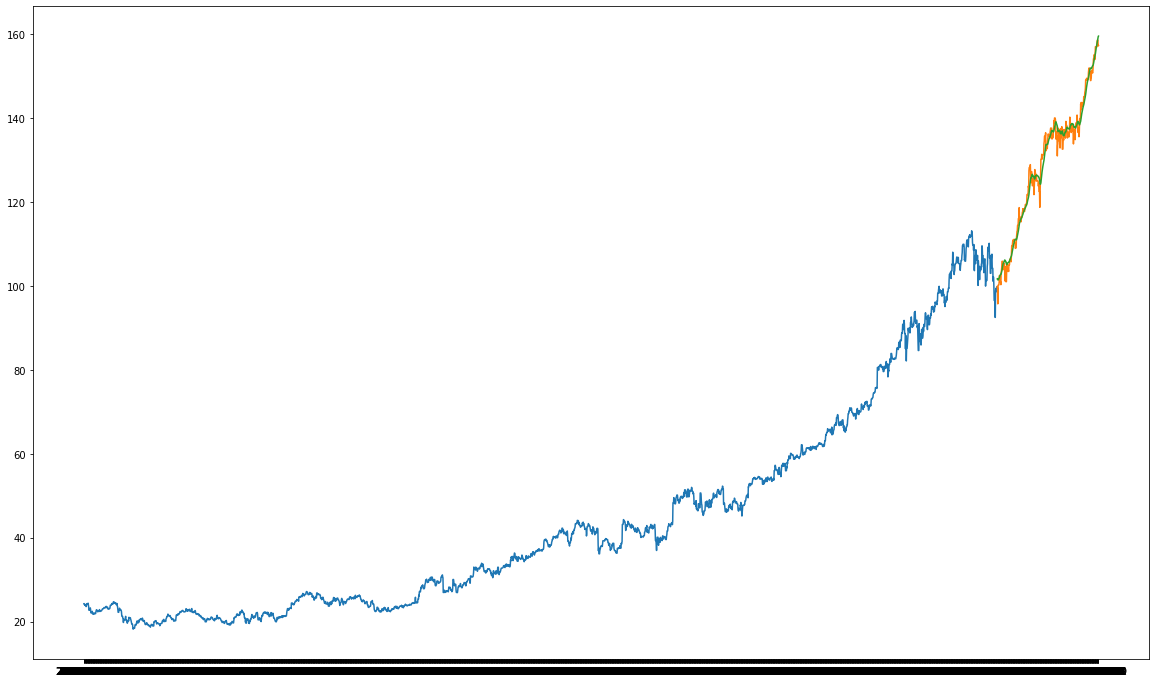

In [45]:
# Plotting
fig,ax=plt.subplots(figsize=(20,12))


plt.plot(train['MSFT'])
plt.plot(valid[['MSFT','Predictions']])

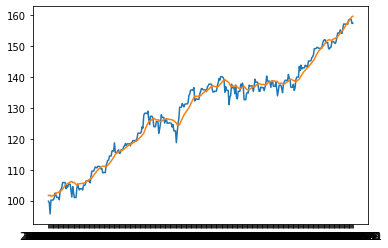

In [46]:
plt.plot(valid[['MSFT','Predictions']])

In [47]:
# Prediction versus Actual
valid

,MSFT,Predictions
Date,,
2019-01-01,99.817421,101.659435
2019-01-02,99.375191,101.720489
2019-01-03,95.719376,101.737749
2019-01-04,100.171211,101.385297
2019-01-05,100.171211,101.516445
2019-01-06,100.171211,101.632600
2019-01-07,100.298965,101.741145
2019-01-08,101.026199,101.853335
2019-01-09,102.470825,102.025050


In [539]:
########

In [584]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()